## **Clasificación de Imagenes en Keras con una CNN**## 


In [21]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                       

from keras.datasets import mnist     # MNIST dataset is included in Keras

from keras.utils import np_utils                         
from tensorflow import keras

Cargar datos de entrenamiento

In [22]:
(X_train_Ori, y_train_Ori), (X_test_Ori, y_test_Ori) = mnist.load_data()

print("X_train shape", X_train_Ori.shape)
print("y_train shape", y_train_Ori.shape)
print("X_test shape", X_test_Ori.shape)
print("y_test shape", y_test_Ori.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Visualizar las imagenes

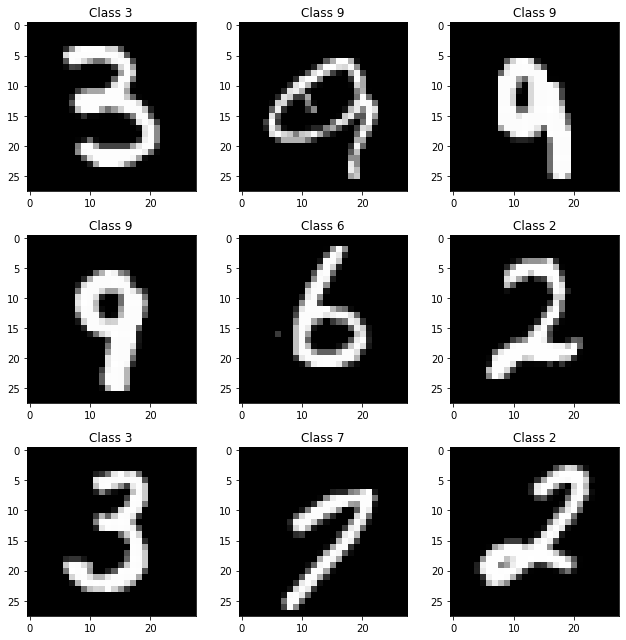

In [23]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train_Ori))
    plt.imshow(X_train_Ori[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train_Ori[num]))
    
plt.tight_layout()

Imagenes como matriz

In [24]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train_Ori[num])

0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   73  147  221  211   87   12   0  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    7  148  241  254  254  254  254  154   0  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0    0   44  173  254  254  252  249  254  254  214  16  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0   33  233  254  254  177   48    0  212  254  184   0  0  0  0  0  
0  0  0  0   0    0    0    0    0    0    0    0    0   38  237  254  128   13    0   28  230  254  206  12  0  0  0  0  
0  0  0  0   0  

Cada pixel de la imagen es una entrada de la red neuronal por lo que el tensor de entrada es de dimension (60000,784)

In [25]:
X_train = X_train_Ori
X_test = X_test_Ori  

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                       
X_test /= 255

print("Dimensiones Matrices de Entrenamiento", X_train.shape)
print("Dimensiones Matrices de Validación", X_test.shape)

Dimensiones Matrices de Entrenamiento (60000, 28, 28)
Dimensiones Matrices de Validación (10000, 28, 28)


In [26]:
print(X_train[10])
print(y_train_Ori[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Para la clasificacion es necesario el one-hot format

In [27]:
nb_classes = 10 # number of unique digits
Y_train = np_utils.to_categorical(y_train_Ori, nb_classes)
Y_test = np_utils.to_categorical(y_test_Ori, nb_classes)

In [28]:
print(y_train_Ori[10])
print(Y_train[10])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Construccion de la Red

In [29]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(16, (3, 3),padding='same',input_shape=(28, 28, 1),use_bias=True))
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.MaxPooling2D((2, 2)))
modelo.add(keras.layers.Conv2D(32, (3, 3), padding='same',use_bias=True))
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.MaxPooling2D((2, 2)))
modelo.add(keras.layers.Conv2D(64, (3, 3),padding='same',use_bias=True))
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(10, activation='softmax'))

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 activation_3 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 activation_4 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

In [30]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenando el modelo

In [31]:
historia=modelo.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 65s 132ms/step - loss: 0.2557 - accuracy: 0.9226
Epoch 2/5
469/469 [==============================] - 50s 107ms/step - loss: 0.0661 - accuracy: 0.9794
Epoch 3/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0456 - accuracy: 0.9860
Epoch 4/5
469/469 [==============================] - 47s 100ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 5/5
469/469 [==============================] - 48s 103ms/step - loss: 0.0283 - accuracy: 0.9910


In [32]:
"""perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()"""

"perdida_train = historia.history['loss']\nepocas = range(1, len(perdida_train) + 1)\n\nplt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')\nplt.title('Pérdida Entrenamiento')\nplt.xlabel('Epocas')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()"

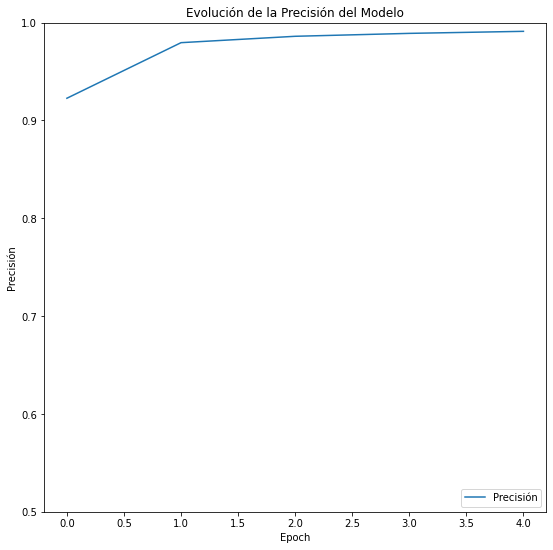

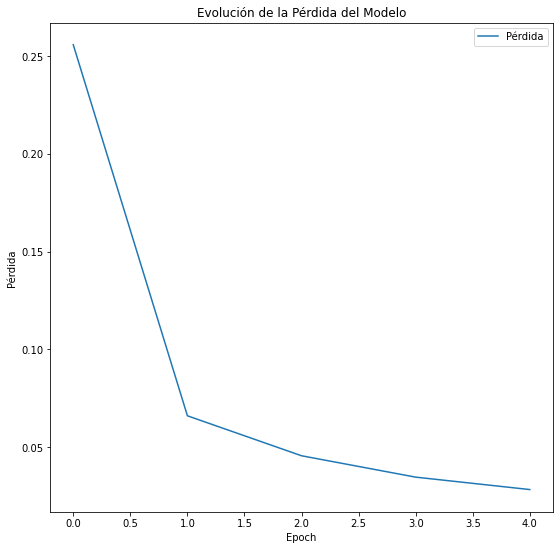

In [33]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

Evaluando el modelo

In [34]:
Metricas= modelo.evaluate(X_test, Y_test)
print('Pérdida (Loss) de validación:', Metricas[0])
print('Precición (accuracy) de validación:', Metricas[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0285 - accuracy: 0.9902
Pérdida (Loss) de validación: 0.028477221727371216
Precición (accuracy) de validación: 0.9901999831199646


Verificando la salida

In [35]:
predicted_classes_Temp = modelo.predict(X_test)
predicted_classes =np.argmax(predicted_classes_Temp, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test_Ori)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_Ori)[0]

313/313 [==============================] - 3s 10ms/step


In [36]:
print(predicted_classes_Temp[10])

[9.9999994e-01 2.0935495e-15 5.3813906e-08 3.3300128e-15 2.9566821e-16
 8.5057369e-12 3.9965439e-10 5.8707102e-11 3.1124048e-10 4.6171809e-09]


In [37]:
print(predicted_classes[10])

0


In [38]:
Numero_Aciertos=np.shape(correct_indices)[0]
Numero_Fallos=np.shape(incorrect_indices)[0]

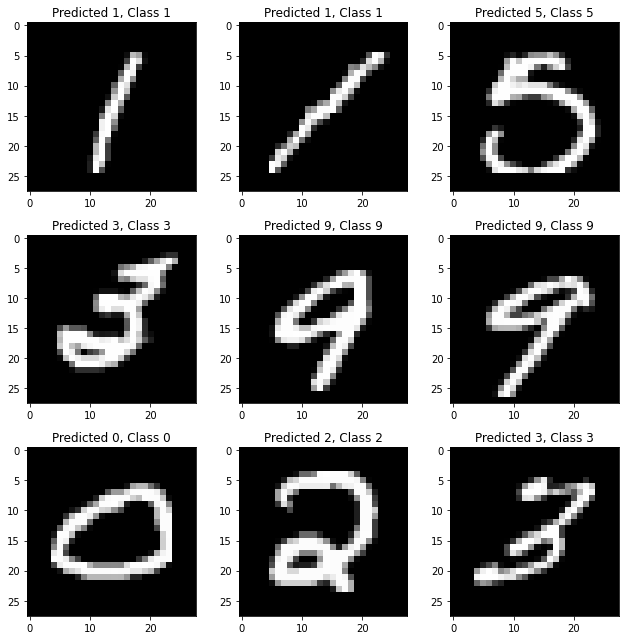

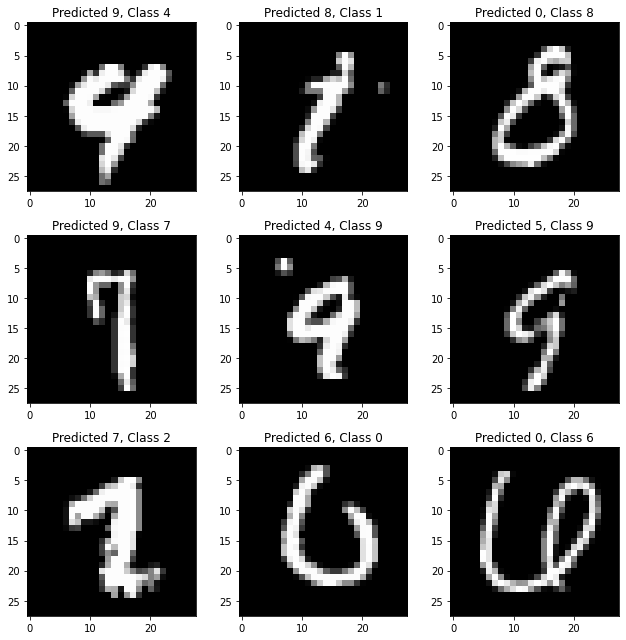

In [39]:
plt.figure()
Indices_Correctos=np.random.permutation(Numero_Aciertos)
for i, correct in enumerate(correct_indices[Indices_Correctos[:9]]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_Ori[correct]))
    
plt.tight_layout()

Indices_Incorrectos=np.random.permutation(Numero_Fallos)
plt.figure()
for i, incorrect in enumerate(incorrect_indices[Indices_Incorrectos[:9]]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test_Ori[incorrect]))
    
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    0    1    1    1    0]
 [   1 1129    1    0    0    0    1    0    3    0]
 [   0    1 1027    0    0    0    0    4    0    0]
 [   1    0    3  997    0    7    0    1    1    0]
 [   0    0    0    0  973   

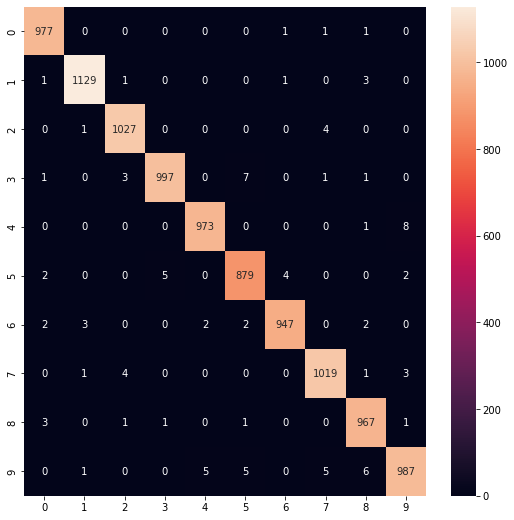

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
import pandas as pd

#y_test_class = np.argmax(y_test,axis=1) # convert encoded labels into classes: say [0, 0, 1] -->  [2] i.e Iris-virginica
y_pred_class = predicted_classes # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] i.e. Iris-versicolor
y_test_class = y_test_Ori
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")